In [14]:
import pandas as pd

df_estban = pd.read_csv('202412_ESTBAN.csv', sep=';', header=0, encoding='latin1', skiprows=2)


In [15]:
print(df_estban.columns.tolist())

['#DATA_BASE', 'UF', 'CODMUN', 'MUNICIPIO', 'CNPJ', 'NOME_INSTITUICAO', 'AGEN_ESPERADAS', 'AGEN_PROCESSADAS', 'VERBETE_110_DISPONIBILIDADES', 'VERBETE_111_CAIXA', 'VERBETE_112_DEPOSITOS_BANCARIOS', 'VERBETE_113_BACEN_RESERV_BANC_EM_ESPECIE', 'VERBETE_120_APLIC_INTERFINANC_DE_LIQUIDEZ', 'VERBETE_130_TIT_E_VAL_MOB_E_INST_FIN_DERIV', 'VERBETE_140_REL_INTERFINANC_E_INTERDEPEND', 'VERBETE_141_CORRESPONDENTES_NO_EXTERIOR + VERBETE_142_CORRESPONDENTES_NO_PAIS', 'VERBETE_144_COBRANCA_EM_TRANSITO + VERBETE_145_ORDENS_DE_PAGAMENTO\t+ VERBETE_146_VAL_LIGADAS_E_TERC_EM_TRANSITO + VERBETE_147_DEPENDENCIAS_NO_PAIS\t+ VERBETE_152_SUPRIMENTOS_INTERDEPENDENCIAS', 'VERBETE_158_OUTR_REL_INTERF_E_INTERDEPEND', 'VERBETE_160_OPERACOES_DE_CREDITO', 'VERBETE_161_EMPRES_E_TIT_DESCONTADOS', 'VERBETE_162_FINANCIAMENTOS', 'VERBETE_163_FIN_RURAIS_AGRICUL_CUST/INVEST', 'VERBETE_167_FINANCIAMENTOS_AGROINDUSTRIAIS', 'VERBETE_169_FINANCIAMENTOS_IMOBILIARIOS', 'VERBETE_171_OUTRAS_OPERACOES_DE_CREDITO', 'VERBETE_172_OUT

     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     ----------- --------------------------- 30.7/106.6 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ - 102.4/106.6 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 106.6/106.6 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.1/8.1 MB 8.9 MB/s eta 0:00:01
   - -------------------------------------- 0.4/8.1 MB 4.9 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.1 MB 7.2 MB/s eta 0:00:01
   ------- -------------------------------- 1.4/8.1 MB 8.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.2/8.1 MB 10.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 15.7 MB/s eta 0:00:01
   ------------------------------- -------- 6.4/8.1 MB 20.5 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 24.5 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


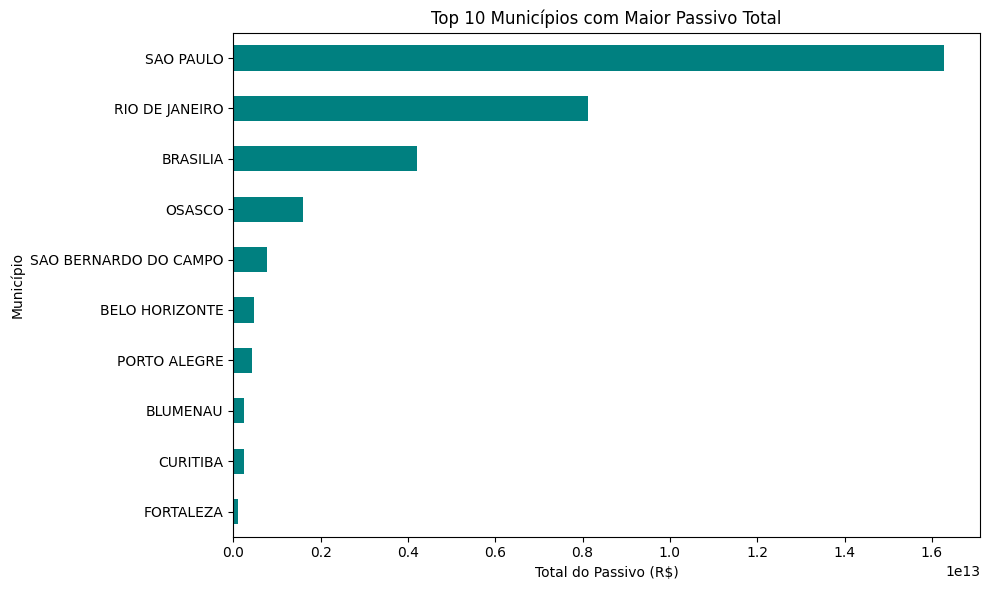

In [9]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

top_municipios = df_estban.groupby('MUNICIPIO')['VERBETE_899_TOTAL_DO_PASSIVO'].sum().nlargest(10).sort_values()

plt.figure(figsize=(10,6))
top_municipios.plot(kind='barh', color='teal')
plt.title('Top 10 Municípios com Maior Passivo Total')
plt.xlabel('Total do Passivo (R$)')
plt.ylabel('Município')
plt.tight_layout()
plt.show()

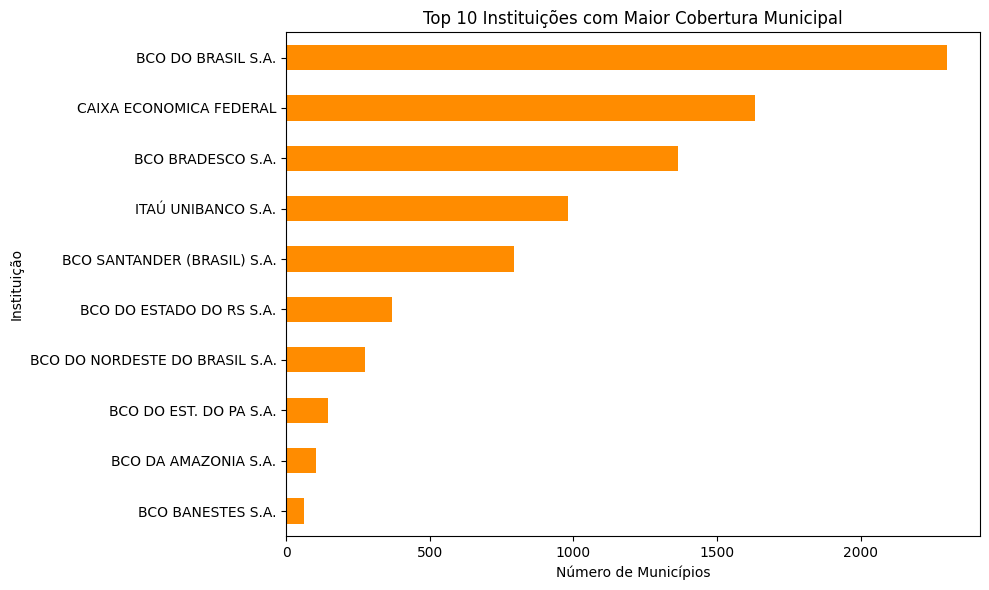

In [10]:
instituicoes_freq = df_estban.groupby('NOME_INSTITUICAO')['CODMUN'].nunique().nlargest(10).sort_values()

plt.figure(figsize=(10,6))
instituicoes_freq.plot(kind='barh', color='darkorange')
plt.title('Top 10 Instituições com Maior Cobertura Municipal')
plt.xlabel('Número de Municípios')
plt.ylabel('Instituição')
plt.tight_layout()
plt.show()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_6728\3434388445.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_poupanca.values, y=top_poupanca.index, palette='Blues_r')


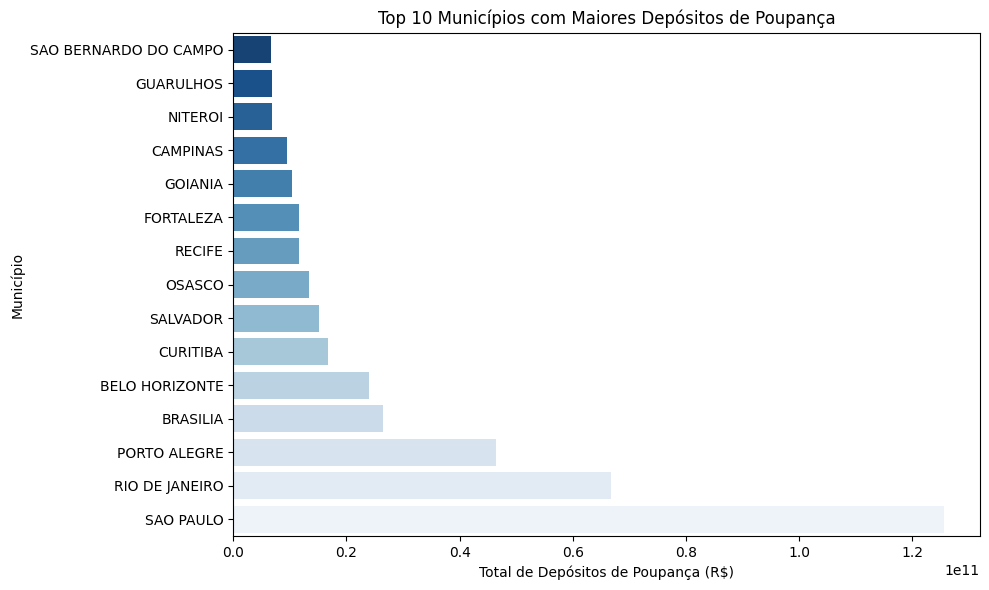

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa e soma os depósitos de poupança por município
top_poupanca = (
    df_estban.groupby('MUNICIPIO')['VERBETE_420_DEPOSITOS_DE_POUPANCA']
    .sum()
    .nlargest(15)
    .sort_values()
)

# Visualiza com gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(x=top_poupanca.values, y=top_poupanca.index, palette='Blues_r')
plt.title('Top 10 Municípios com Maiores Depósitos de Poupança')
plt.xlabel('Total de Depósitos de Poupança (R$)')
plt.ylabel('Município')
plt.tight_layout()
plt.show()


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_6728\1578245565.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_poupanca.values, y=top_poupanca.index, palette='Blues_r')


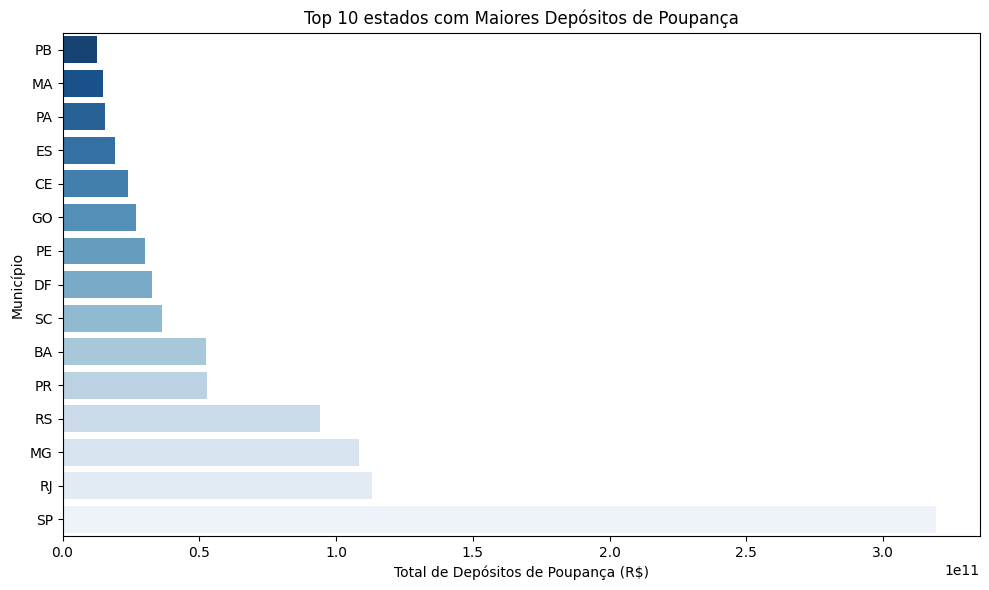

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa e soma os depósitos de poupança por município
top_poupanca = (
    df_estban.groupby('UF')['VERBETE_420_DEPOSITOS_DE_POUPANCA']
    .sum()
    .nlargest(15)
    .sort_values()
)

# Visualiza com gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(x=top_poupanca.values, y=top_poupanca.index, palette='Blues_r')
plt.title('Top 10 estados com Maiores Depósitos de Poupança')
plt.xlabel('Total de Depósitos de Poupança (R$)')
plt.ylabel('Município')
plt.tight_layout()
plt.show()
